# Hierarchical Clustering

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

- Murder numeric Murder arrests (per 100,000)
- Assault numeric Assault arrests (per 100,000)
- UrbanPop numeric Percent urban population
- Rape numeric Rape arrests (per 100,000)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

datamızı tanıyalım 

amerikanın alabama eyaletinde 100.000 vakadan 0,8 (800'ü) cinayet, 45.000'i fiziki saldırı, 7300 tanesi tecavüz demek diğer suçları listeye almamışlar

58 ise alabaamanın merkez nüfusunun genele oranı

In [3]:
df = pd.read_csv("USArrest.csv", index_col=0)

In [4]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.8,45,58,7.3
Alaska,2.1,46,48,7.8
Arizona,2.1,48,80,8.3
Arkansas,2.2,53,50,9.3
California,2.2,56,91,9.5


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


burada ne yaparız

burada scale yapmam lazım 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


burada claslar belli mi. net bir ayrım yapmak mümkün değil

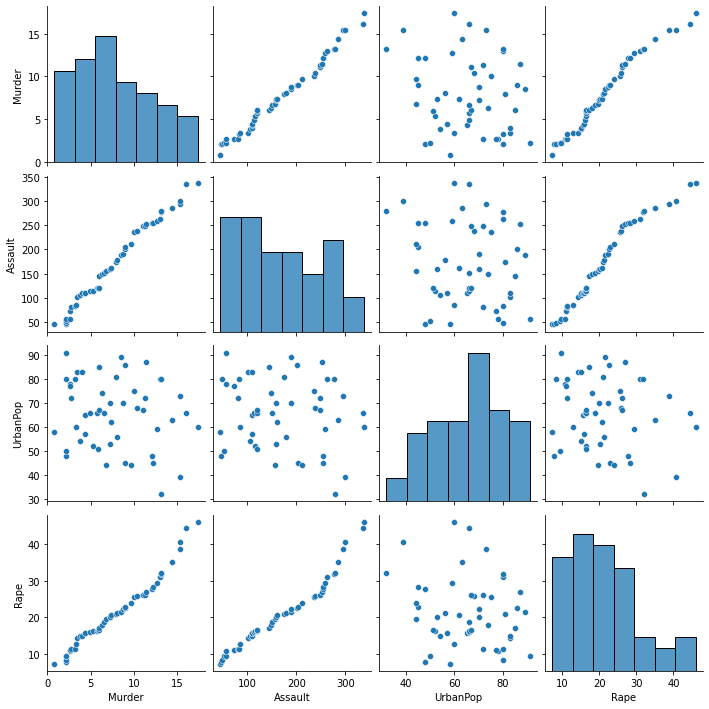

In [7]:
sns.pairplot(df);

cinayet sayıularına göre eyaletlere bir bakalım dedim

burada en yaşanılası yer alabama

buradan nasıl bir insight sağlayabilirim. yine sağlayamam ama eyaletleri çok cinayet işlenen orta düzey ve az diye ayırabilirim ve bunu bir emlakçının kullanmasına destek olabilirim

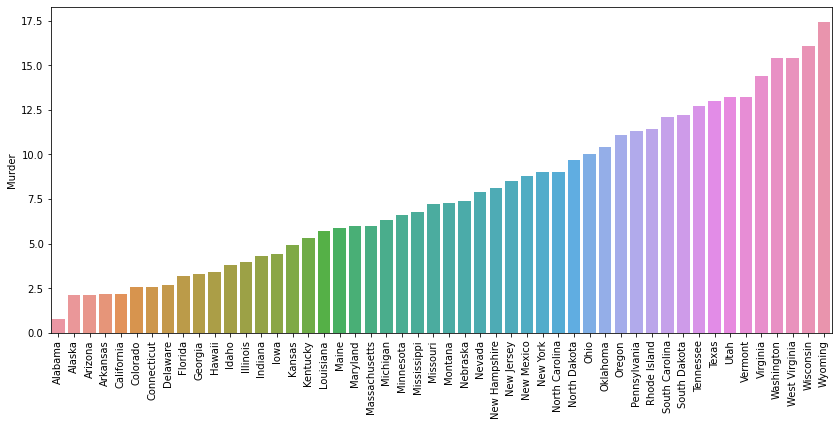

In [8]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Murder.sort_values(), x = df.Murder.sort_values().index)
plt.xticks(rotation = 90);

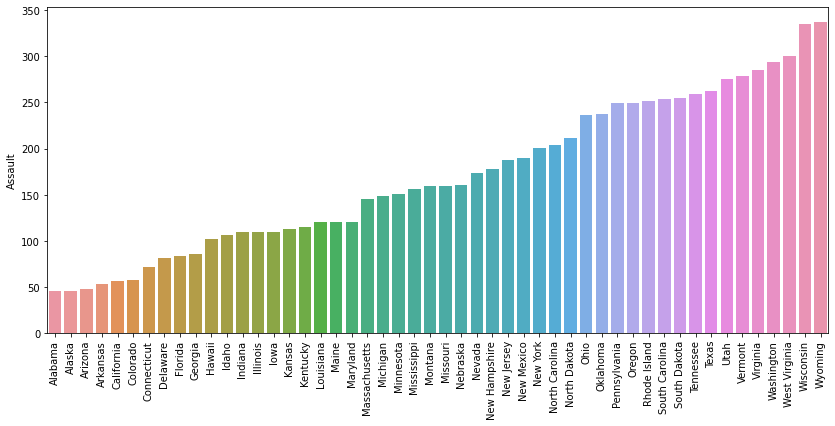

In [9]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Assault.sort_values(), x = df.Assault.sort_values().index)
plt.xticks(rotation = 90);

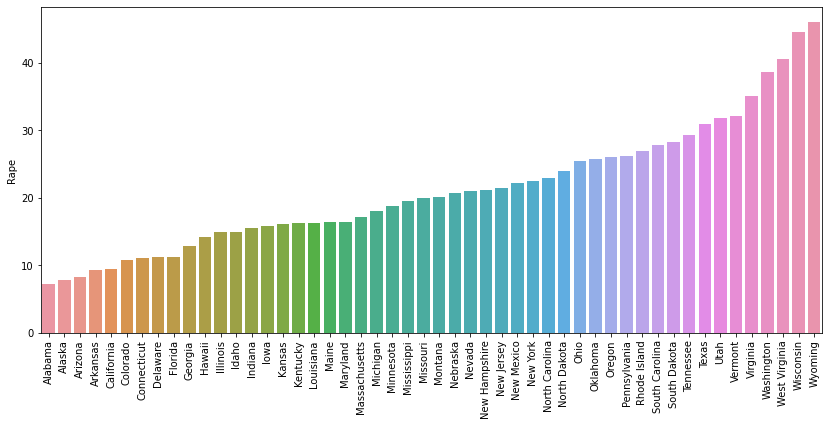

In [10]:
plt.figure(figsize = (14,6))
sns.barplot(y = df.Rape.sort_values(), x = df.Rape.sort_values().index)
plt.xticks(rotation = 90);

## Hopkins Test

In [11]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [12]:
hopkins(df, df.shape[0])

0.342927750756338

## Scale

burada ben min max sclaer için daha iyi skor aldım ancak siz buna her ikisi için bakıp deneyebilirsiniz

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
df1 = df.copy()
df2 = df.copy()

In [15]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])

0.21708323257547332

In [16]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.21300730209975358

In [17]:
scaler = MinMaxScaler()

In [18]:
df_scaled = scaler.fit_transform(df)

In [19]:
X = pd.DataFrame(df_scaled, columns=df.columns)

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


linkage ile tüm metriklerimi tanımlıyorum

In [22]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

ward ı çizdirdim

bana 2 class uygun dedi

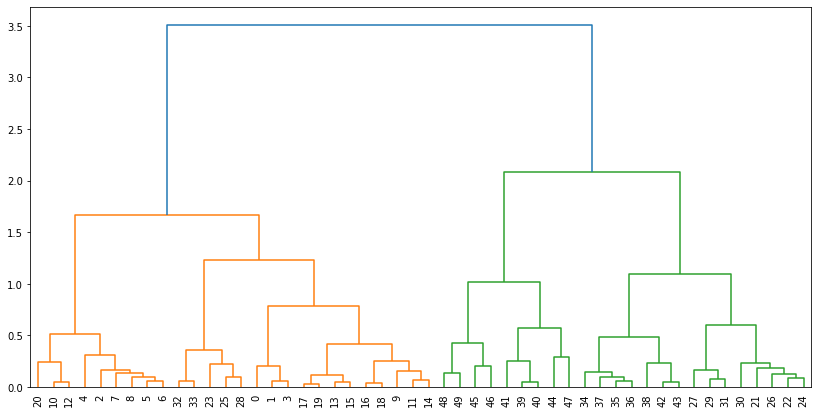

In [23]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

Burada yine lastp parametresi ile 10 girdim dendograma daha temiz bir görsel almak için 

Ancak bunun içine birde show_contracted = True parametresini verdim. Burada yaptığım işlem dallanmayı 10'da kestiğinde halen görselin devamında kaç tane daha cluster var onu bize nokta olarak gösteriyor 

Burada classın çizgisi 1 sayılıyor ilk "o" ise 2 diye sayılıyor. Yani sarı (3)  yazan çizgide 2 küme daha var

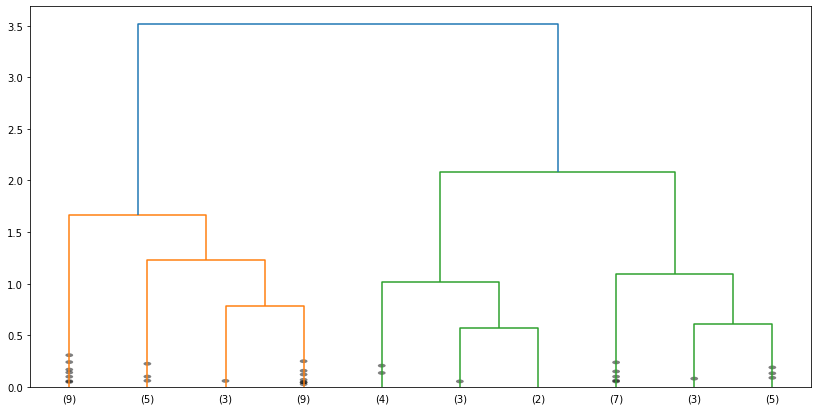

In [24]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

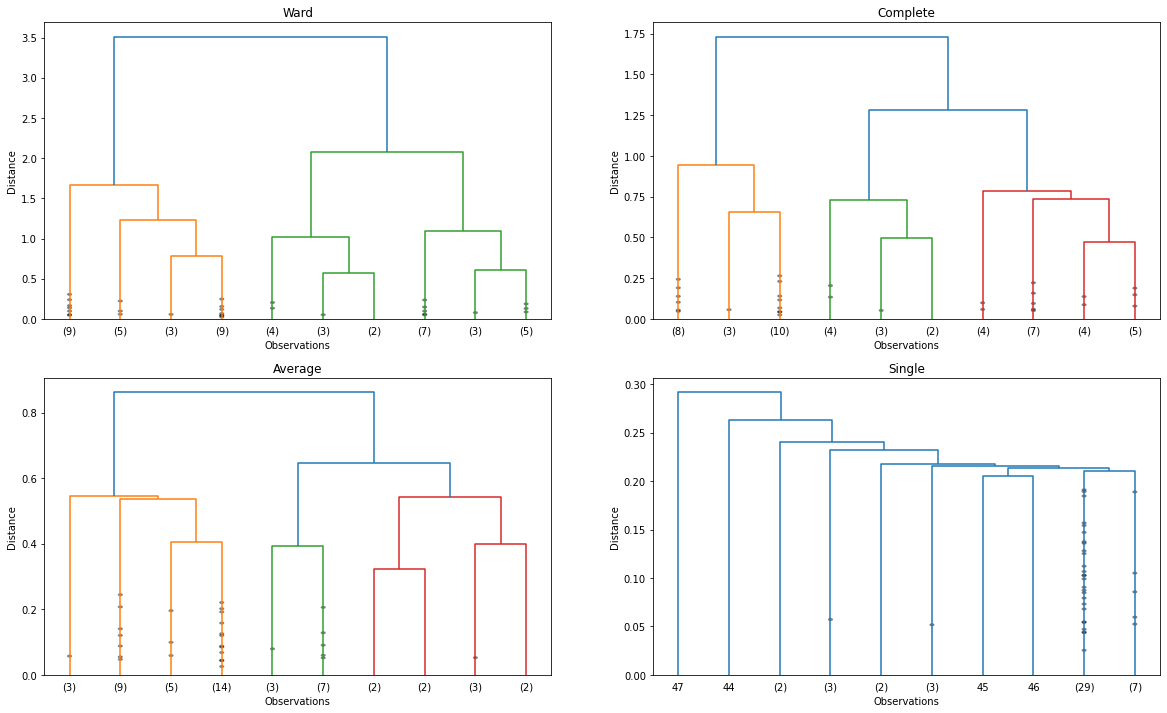

In [25]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

tüm metrikleri karşılaştırdım ve burada wards 2 derken complete 3 average 3 dedi

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [26]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

burada silyet skoruna bakıyorum ve bana hala 2 class olması gerektiğini söylüyor. Ama 3 de iyi

2 ile 3 arasında gidip geliyor data ama ben yukardaki görselde 3 sınıf olacağını düşünüyorum.

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.45421907210414214
Silhouette Score for 3 clusters: 0.3180902156279954
Silhouette Score for 4 clusters: 0.13602999771899232
Silhouette Score for 5 clusters: 0.16195986543258523
Silhouette Score for 6 clusters: 0.22945281939930115
Silhouette Score for 7 clusters: 0.24214267818856985
Silhouette Score for 8 clusters: 0.3051367809988358
Silhouette Score for 9 clusters: 0.29774346557180853
Silhouette Score for 10 clusters: 0.2936409237035898


In [29]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.000000,0.000000,0.440678,0.000000
1,0.078313,0.003425,0.271186,0.012920
2,0.078313,0.010274,0.813559,0.025840
3,0.084337,0.027397,0.305085,0.051680
4,0.084337,0.037671,1.000000,0.056848


modelimi 3'e göre kurup bir bakayım çünkü görselim bana bir insight sağlamıştıkurup bir bakayım

In [30]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)
X["cluster"] = clusters

modelimi 3 ile kurduğumda  murder ve assault bir birinden iyi ayrışmış

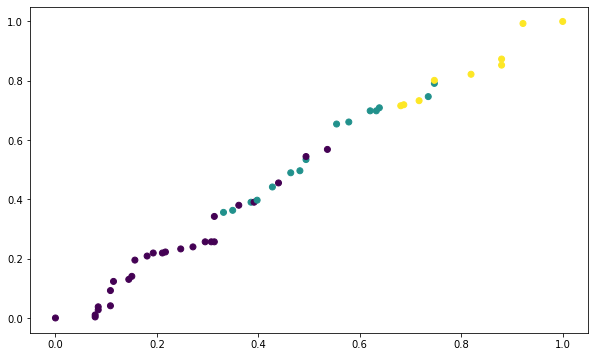

In [31]:
plt.scatter(X.Murder, X.Assault, c = clusters, cmap = "viridis");

murder ile urbanpop için baktığımda aslında murdere göre iyi bir ayrışma varken urban pop a göre düzgün bir ayrışma yok

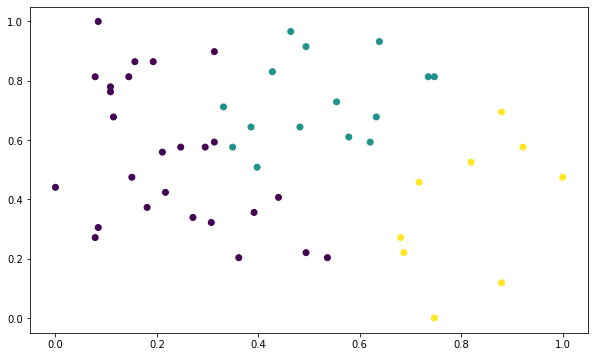

In [32]:
plt.scatter(X.Murder, X.UrbanPop, c = clusters, cmap = "viridis");

ortalamalara baktığımda urban pop haricinde olan featureler için bir doğrusallık söz konusu buda bana 3 featurenin birbiri arasında iyi ayrışacağının bir diğer göstergesi

In [33]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Murder,0.226135,0.522490,0.814592
Assault,0.215227,0.561872,0.834475
UrbanPop,0.543025,0.731073,0.370998
Rape,0.190320,0.428079,0.736721


line plot da bana 3 featurenin gayet iyi ayrıştığını ama urbanda bir değişkenlik olduğunu gösteriyor

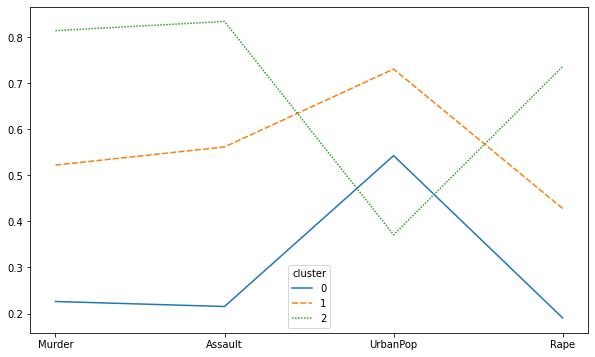

In [34]:
sns.lineplot(data = clus_pred);

box plot ile baktığımda ise urban dışındakilerde whiskerlar dışında birbirini kesen bir observation görmediğimden diyorum ki urbanı düşürüp bir bakayım

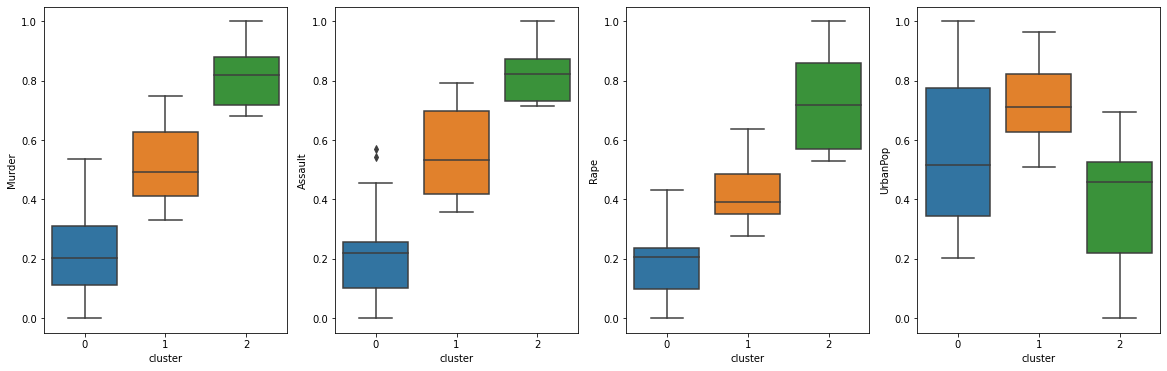

In [35]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Murder", x = "cluster", data = X)

plt.subplot(142)
sns.boxplot(y = "Assault", x = "cluster", data = X)

plt.subplot(143)
sns.boxplot(y = "Rape", x = "cluster", data = X)

plt.subplot(144)
sns.boxplot(y = "UrbanPop", x = "cluster", data = X);

buna göre class sayılarına baktım bir uyumsuzluk da var

In [36]:
X.cluster.value_counts()

0    26
1    15
2     9
Name: cluster, dtype: int64

bu sefer 3 featuıre ile bakyorum modelime

In [37]:
X2 = X.iloc[:, [0,1,3]]
X2.head()

,Murder,Assault,Rape
0,0.000000,0.000000,0.000000
1,0.078313,0.003425,0.012920
2,0.078313,0.010274,0.025840
3,0.084337,0.027397,0.051680
4,0.084337,0.037671,0.056848


In [38]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

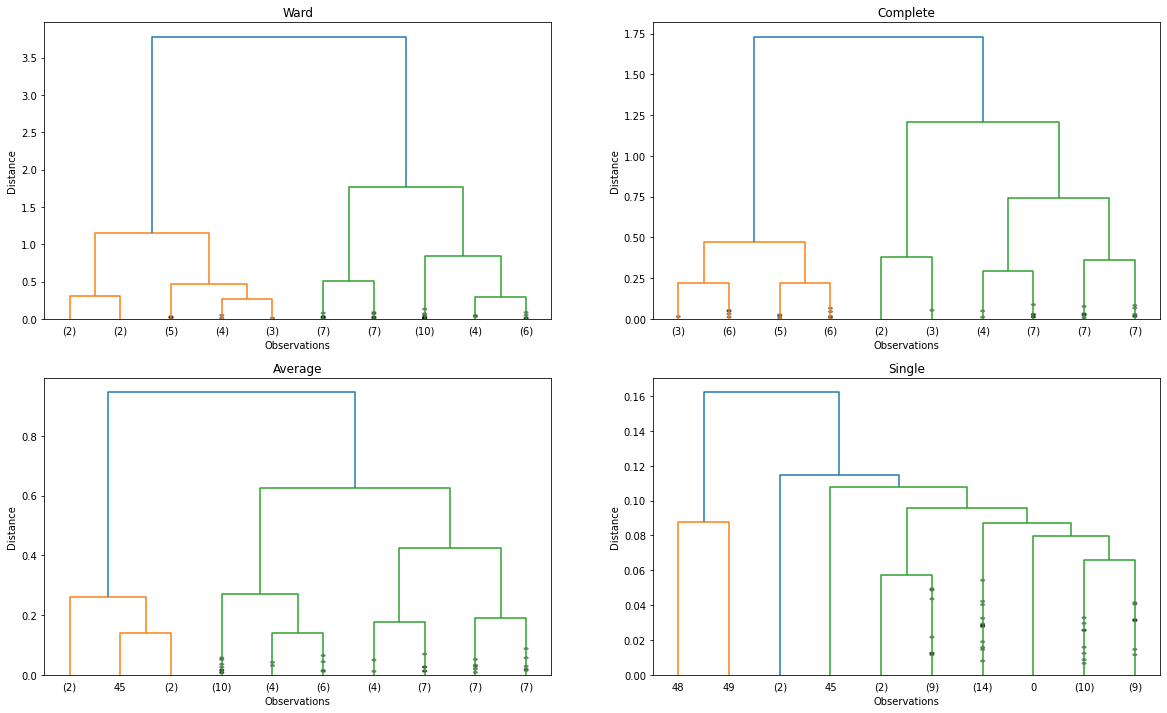

In [39]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

hayda dendogram bu sefer iyice 2 demeye başladı. belki complete 3 diyor

siluet skorlarıma bakttığımda ise bu sefer 3 cluster ın 23 puan yükseldiğini görüyorum. Bu modelin cluster sayısının 3 olma olasılığını daha da yükseltti.

In [40]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473215
Silhouette Score for 4 clusters: 0.49680242574181405
Silhouette Score for 5 clusters: 0.4610301160129345
Silhouette Score for 6 clusters: 0.45309851046082883
Silhouette Score for 7 clusters: 0.39604153006494913
Silhouette Score for 8 clusters: 0.39684807539987044
Silhouette Score for 9 clusters: 0.3700971634671143
Silhouette Score for 10 clusters: 0.36251487312336017


final modeli kuruyorum

In [41]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

value counts yaptığımda classlar arası uyumun daha da arttığını görüyorum

In [42]:
X2.cluster.value_counts()

1    20
0    16
2    14
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='Rape'>

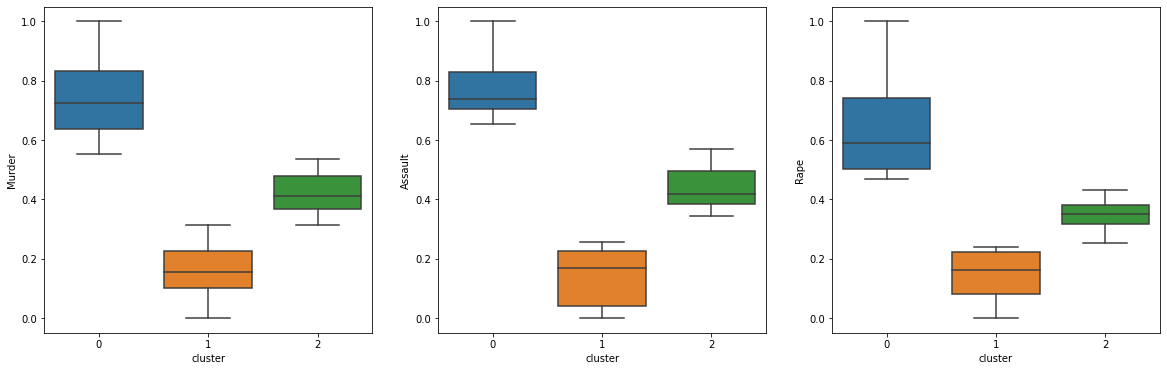

In [43]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Murder", x = "cluster", data = X2)

plt.subplot(132)
sns.boxplot(y = "Assault", x = "cluster", data = X2)

plt.subplot(133)
sns.boxplot(y = "Rape", x = "cluster", data = X2)

Bakın boxplotta whisker lar bile birbirini kesmiyor

**Evaluation**

- 0 : states with high crime rates
- 1 : states with low crime rates
- 2 : states with medium crime rates

Bunları bir isimlendirdim

0 = Hight

1= low

2= Medium

In [44]:
X2["crime_level"] = X2["cluster"].map({0:"high", 1:"low",2:"medium"})
X2.head()

,Murder,Assault,Rape,cluster,crime_level
0,0.000000,0.000000,0.000000,1,low
1,0.078313,0.003425,0.012920,1,low
2,0.078313,0.010274,0.025840,1,low
3,0.084337,0.027397,0.051680,1,low
4,0.084337,0.037671,0.056848,1,low


In [45]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

en başta indexe atadığım eyaletleri ve leveli veriyorum ve bunu bir df olarak görüyorum

In [46]:
X2["States"] = df.index
X2

,Murder,Assault,Rape,cluster,crime_level,States
0,0.000000,0.000000,0.000000,1,low,Alabama
1,0.078313,0.003425,0.012920,1,low,Alaska
2,0.078313,0.010274,0.025840,1,low,Arizona
3,0.084337,0.027397,0.051680,1,low,Arkansas
4,0.084337,0.037671,0.056848,1,low,California
5,0.108434,0.041096,0.090439,1,low,Colorado
6,0.108434,0.092466,0.098191,1,low,Connecticut
7,0.114458,0.123288,0.100775,1,low,Delaware
8,0.144578,0.130137,0.103359,1,low,Florida
9,0.150602,0.140411,0.142119,1,low,Georgia


Elde ettiğimiz bu classları listeleyebiliriz

In [47]:
X2[X2.crime_level=="low"]["States"]

0         Alabama
1          Alaska
2         Arizona
3        Arkansas
4      California
5        Colorado
6     Connecticut
7        Delaware
8         Florida
9         Georgia
10         Hawaii
11          Idaho
12       Illinois
13        Indiana
14           Iowa
15         Kansas
16       Kentucky
17      Louisiana
18          Maine
19       Maryland
Name: States, dtype: object

In [48]:
X2[X2.crime_level=="high"]["States"]

34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West Virginia
48         Wisconsin
49           Wyoming
Name: States, dtype: object